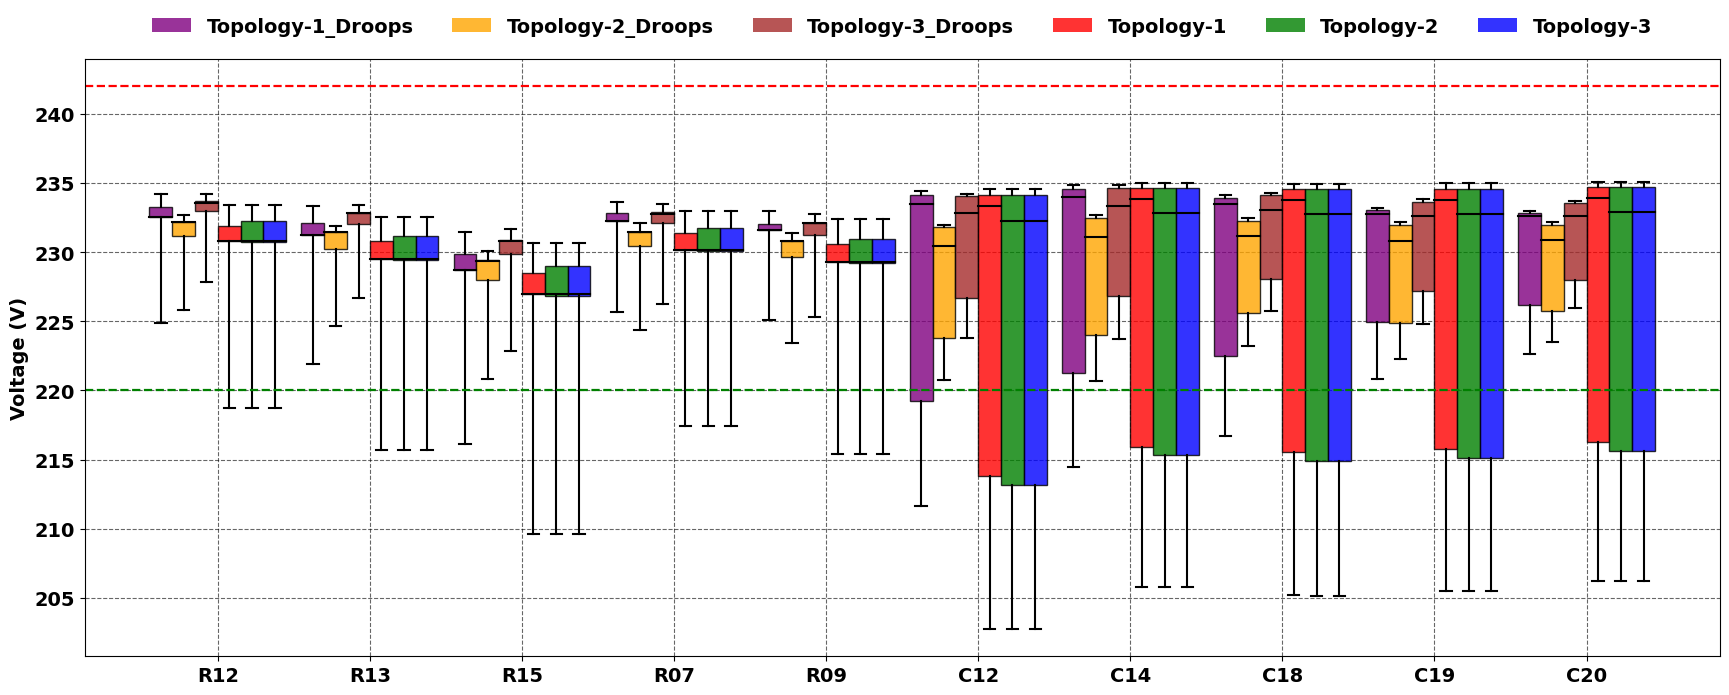

In [ ]:
## Working OK - Buses not linked to VSC case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

# Define parameters
selected_buses = ['R12', 'R13', 'R15', 'R07', 'R09', 'C12', 'C14', 'C18', 'C19', 'C20']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(18, 7))

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


        # Add legend for ALL scenarios
        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(mapped_scenario)

ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

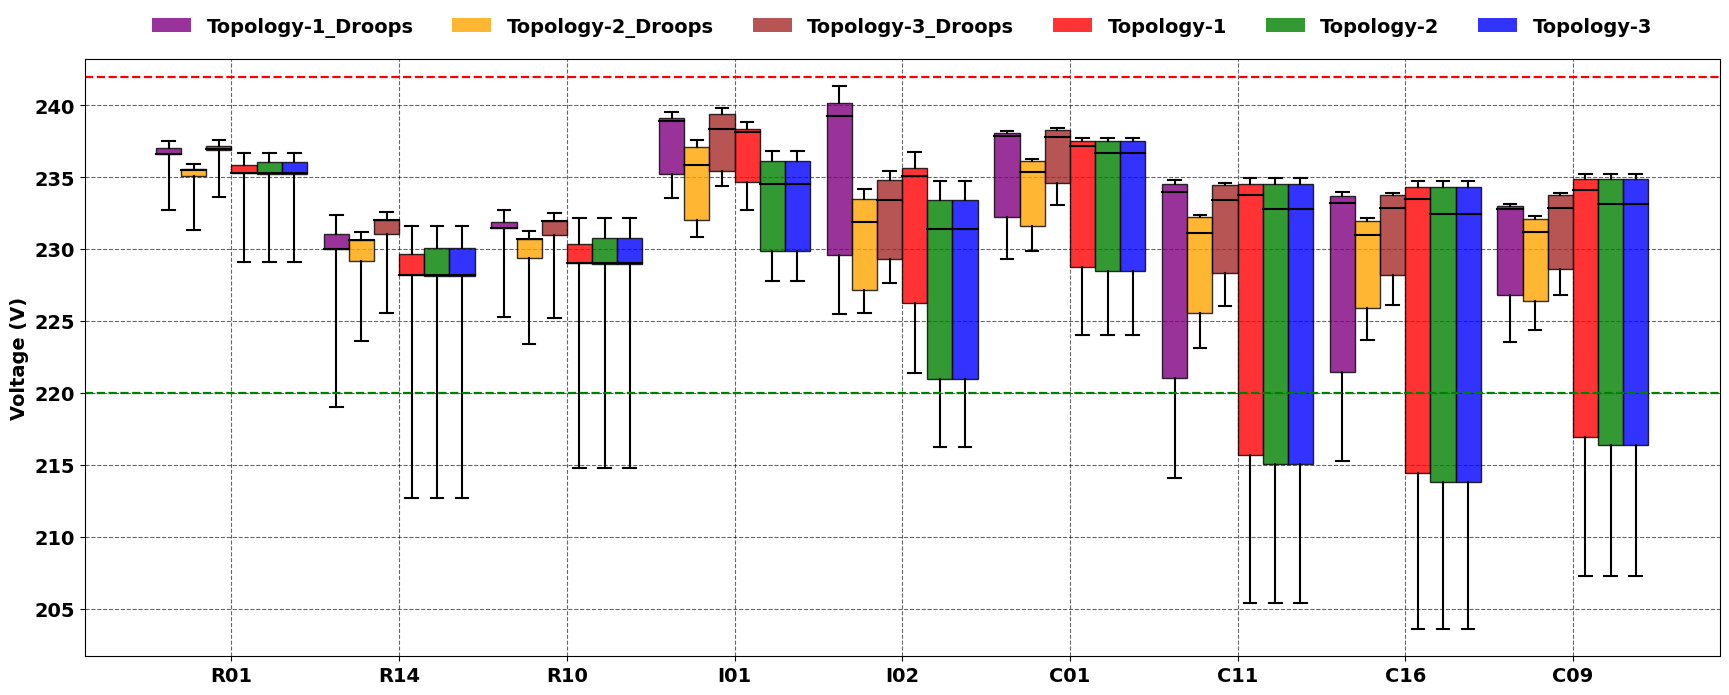

In [ ]:
## Working OK --- Buses linked to VSC case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

# Define parameters
selected_buses = ['R01', 'R14', 'R10', 'I01', 'I02', 'C01', 'C11','C16', 'C09']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(18, 7))

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


        # Add legend for ALL scenarios
        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(mapped_scenario)

ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

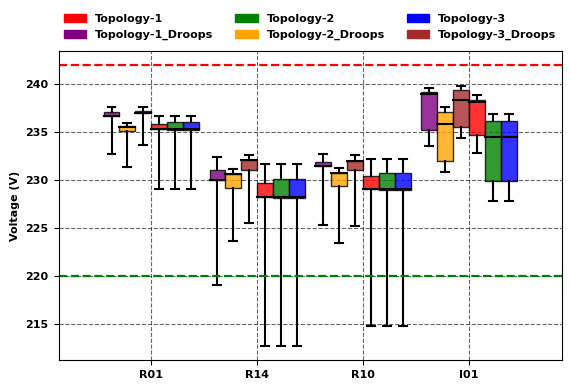

In [ ]:
## Working OK --- Buses linked to VSC case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R01', 'R14', 'R10', 'I01']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'size': 8, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=8)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=8)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

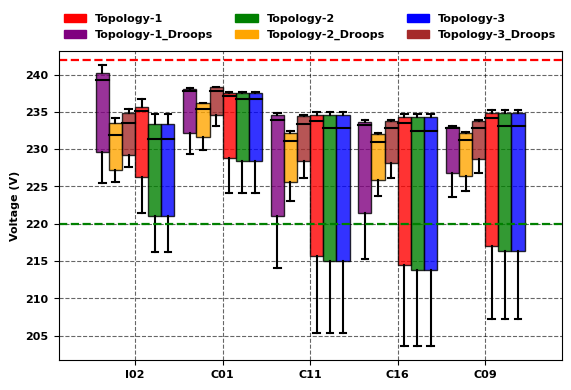

In [ ]:
## Working OK --- Buses linked to VSC case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['I02', 'C01', 'C11','C16', 'C09']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'size': 8, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=8)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=8)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

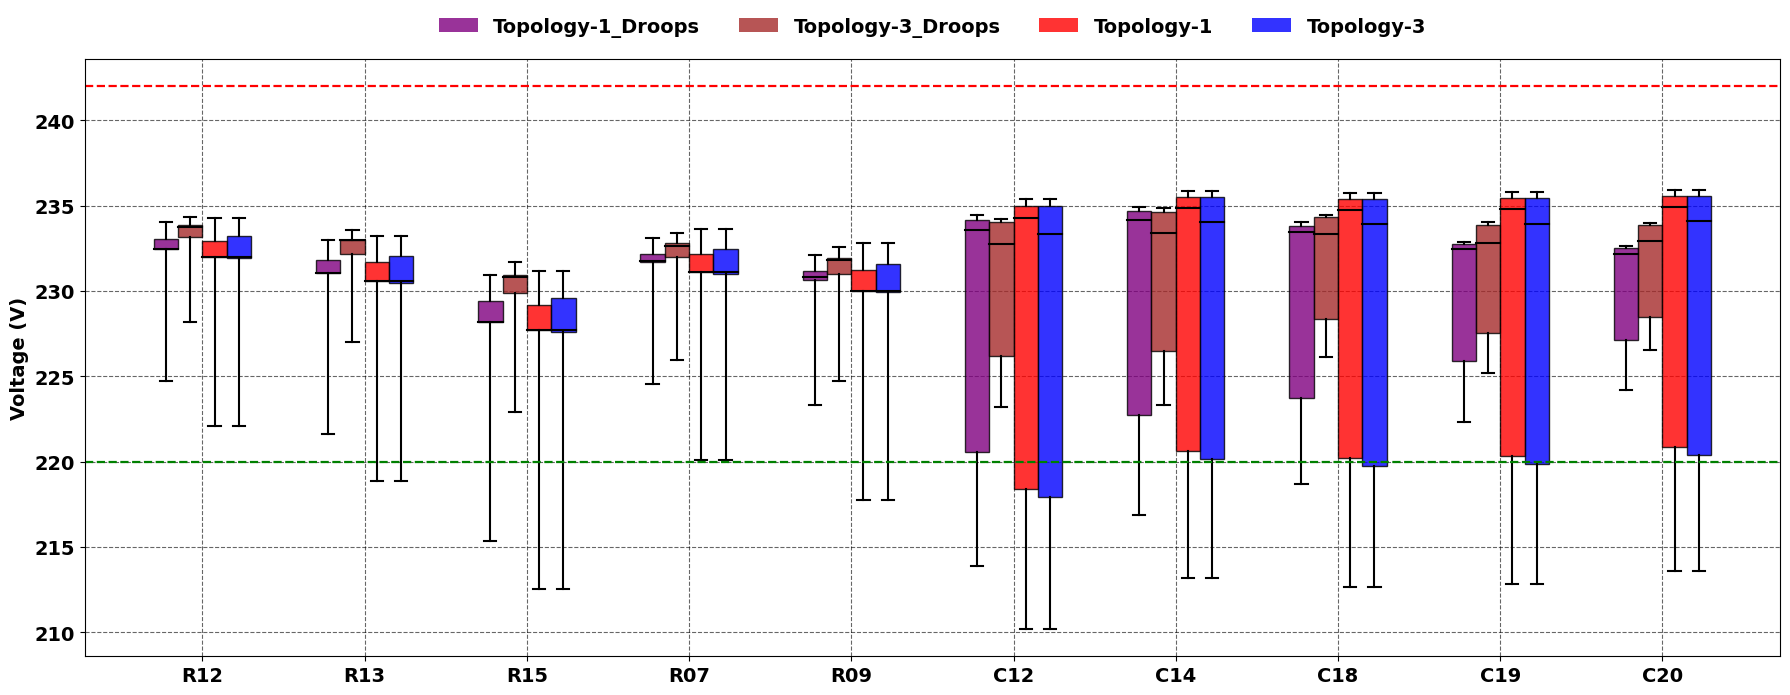

In [32]:
## Working OK - Buses not linked to VSC case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

# Define parameters
selected_buses = ['R12', 'R13', 'R15', 'R07', 'R09', 'C12', 'C14', 'C18', 'C19', 'C20']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case1.csv', 'voltage_With_Droop_T3_case1.csv',
    'voltage_Without_Droop_T1_case1.csv', 'voltage_Without_Droop_T3_case1.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(18, 7))

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


        # Add legend for ALL scenarios
        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(mapped_scenario)

ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

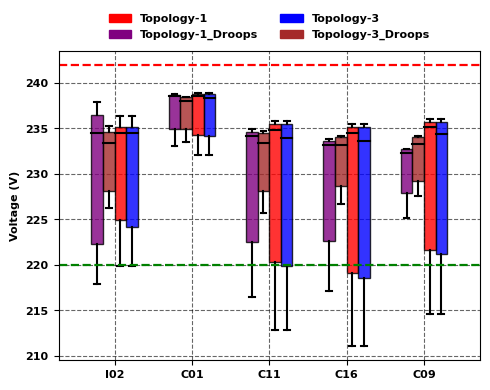

In [37]:
## Working OK --- Buses linked to VSC case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['I02', 'C01', 'C11','C16', 'C09']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case1.csv', 'voltage_With_Droop_T3_case1.csv',
    'voltage_Without_Droop_T1_case1.csv', 'voltage_Without_Droop_T3_case1.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False, prop={'size': 8, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=8)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=8)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

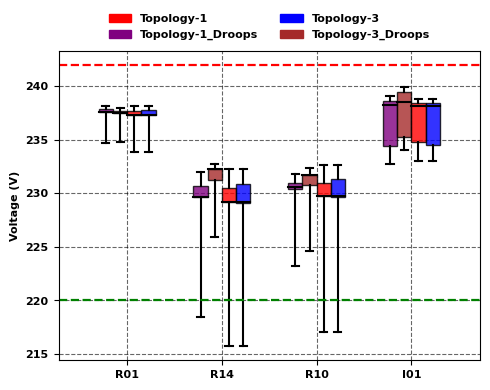

In [38]:
## Working OK --- Buses linked to VSC case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R01', 'R14', 'R10', 'I01']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case1.csv', 'voltage_With_Droop_T3_case1.csv',
    'voltage_Without_Droop_T1_case1.csv', 'voltage_Without_Droop_T3_case1.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(5, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False, prop={'size': 8, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=8)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=8)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=8)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
### New Figures ##

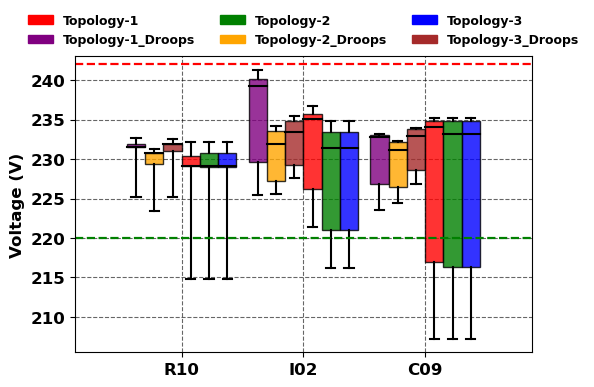

In [2]:
## Working OK --- Buses linked to VSC at the end of each feeder -- case-3  --
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R10', 'I02', 'C09']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

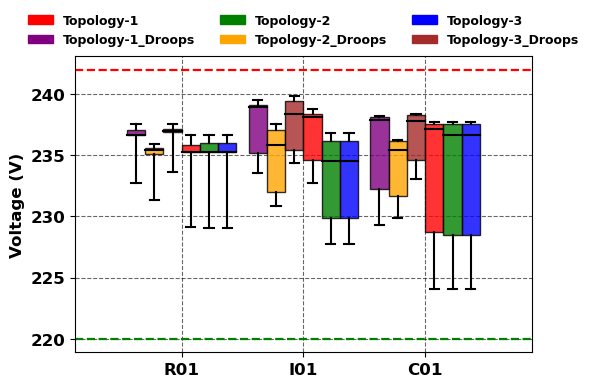

In [3]:
## Working OK --- First Buses of each feeder -- case-3  --
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R01', 'I01', 'C01']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility if needed

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

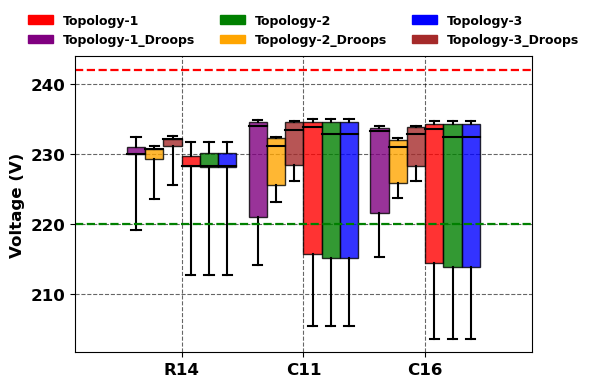

In [4]:
## Working OK --- Buses of case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R14', 'C11', 'C16']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility if needed

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

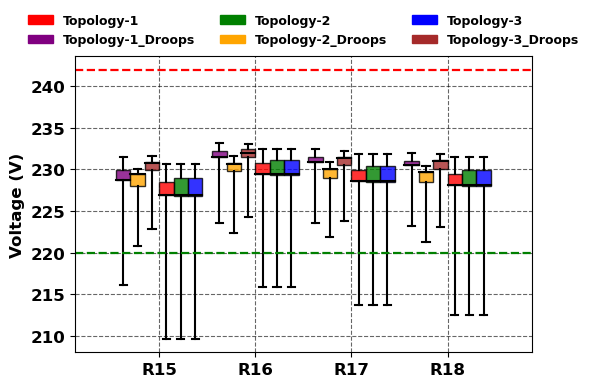

In [5]:
## Working OK --- Buses of case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R15', 'R16', 'R17', 'R18']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot. 
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility if needed

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

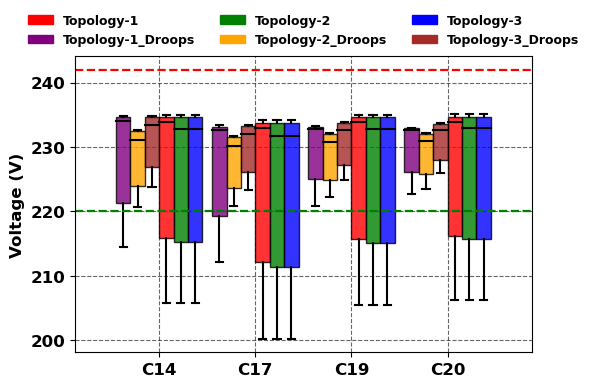

In [6]:
## Working OK --- Buses of case-3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['C14', 'C17', 'C19', 'C20']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot. 
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6, 4)) #Increased figure size for better legend visibility if needed

#Plot the boxplots
handles = []
labels = []
width = 0.15 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

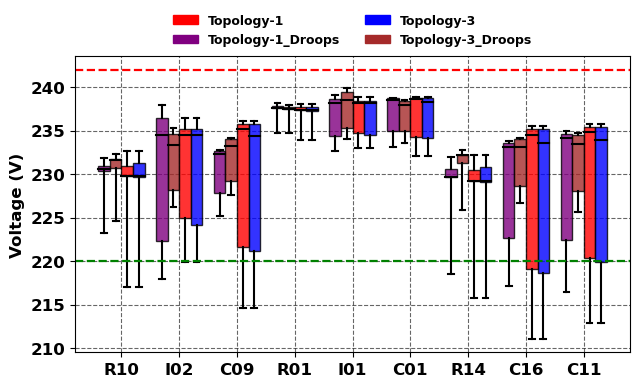

In [8]:
## Working OK --- Buses of case-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R10', 'I02', 'C09','R01', 'I01', 'C01', 'R14', 'C16', 'C11']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case1.csv', 'voltage_With_Droop_T3_case1.csv',
    'voltage_Without_Droop_T1_case1.csv', 'voltage_Without_Droop_T3_case1.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility if needed

#Plot the boxplots
handles = []
labels = []
width = 0.2 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=2, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

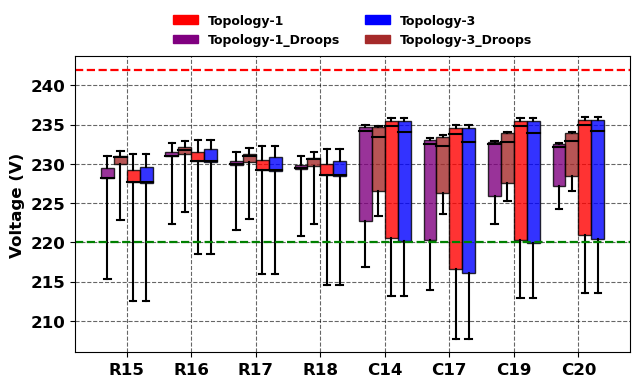

In [9]:
## Working OK --- Buses of case-1 (2)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import iqr

# Define parameters
selected_buses = ['R15', 'R16', 'R17','R18', 'C14', 'C17', 'C19', 'C20']

#Improved color
topology_colors = {
    'Topology-1': 'red', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case1.csv', 'voltage_With_Droop_T3_case1.csv',
    'voltage_Without_Droop_T1_case1.csv', 'voltage_Without_Droop_T3_case1.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data (just for checking)
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages


scenario_mapping = {
    'With_Droop_T1_case1': 'Topology-1_Droops',
    'With_Droop_T3_case1': 'Topology-3_Droops',
    'Without_Droop_T1_case1': 'Topology-1',
    'Without_Droop_T3_case1': 'Topology-3'
}

# Create box plot
fig, ax = plt.subplots(figsize=(6.5, 4)) #Increased figure size for better legend visibility if needed

#Plot the boxplots
handles = []
labels = []
width = 0.2 # Adjust width as needed for spacing between boxes

positions = np.arange(len(selected_buses))

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        # Use a very large whis value to force whiskers to min/max
        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)


# Create a custom legend
legend_handles = []
legend_labels = []

for i, scenario in enumerate(sorted(topology_colors.keys())):
    handle = mpatches.Patch(color=topology_colors[scenario], label=scenario)
    legend_handles.append(handle)
    legend_labels.append(scenario)

# Create the legend using the custom handles and labels
legend = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=2, frameon=False, prop={'size': 9, 'weight': 'bold'})


ax.set_xticks(positions + width * (len(box_plot_data[selected_buses[0]]) -1)/ 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=12)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)


ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)  # Min limit voltage

ax.tick_params(axis='y', labelsize=12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
### END ###

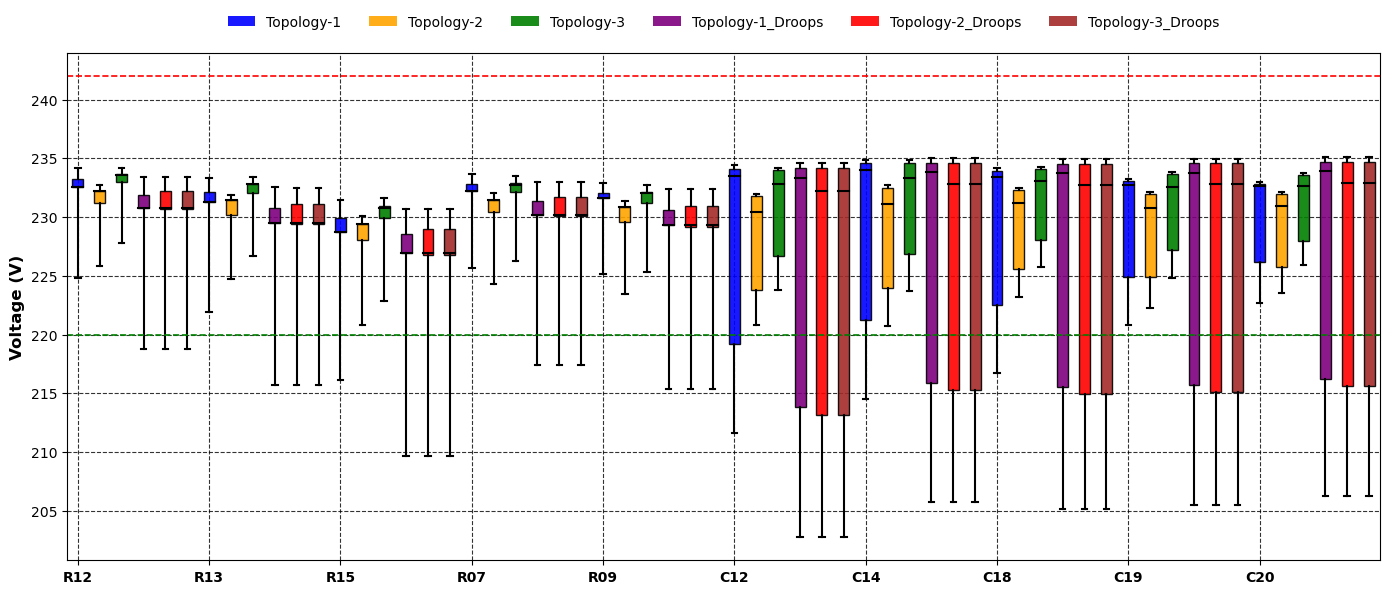

In [3]:
###### OK One issue the X-Axis not bold?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

# Define parameters
selected_buses = ['R12', 'R13', 'R15', 'R07', 'R09', 'C12', 'C14', 'C18', 'C19', 'C20']

#Improved color dictionary with more descriptive keys
topology_colors = {
    'Topology-1': 'blue', 'Topology-2': 'orange', 'Topology-3': 'green',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'red', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

# Function to read and process data from a single CSV file
def process_data(file_path, selected_buses):
    try:
        df = pd.read_csv(file_path)
        #Data Cleaning: Handling potential errors in data
        df = df.dropna(subset=['Bus', 'Voltage (V)'])
        df['Voltage (V)'] = pd.to_numeric(df['Voltage (V)'], errors='coerce')
        df = df.dropna(subset=['Voltage (V)'])

        filtered_data = {bus: [] for bus in selected_buses}
        for bus in selected_buses:
            bus_data = df[df['Bus'] == bus]['Voltage (V)'].values
            if len(bus_data) > 0:
                filtered_data[bus] = bus_data
        return filtered_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing '{file_path}': {e}")
        return None

#Read and process all CSV files
all_data = {}
for file_name in file_names:
    data = process_data(file_name, selected_buses)
    if data:
        scenario_name = file_name.replace('.csv', '').replace('voltage_', '')
        all_data[scenario_name] = data

# Prepare data for box plot.  Restructure for easier legend handling
box_plot_data = {}
for scenario, data in all_data.items():
    for bus, voltages in data.items():
        if bus not in box_plot_data:
            box_plot_data[bus] = {}
        box_plot_data[bus][scenario] = voltages

#Improved scenario mapping for legend and color assignment
scenario_mapping = {
    'With_Droop_T1_case3': 'Topology-1_Droops',
    'With_Droop_T2_case3': 'Topology-2_Droops',
    'With_Droop_T3_case3': 'Topology-3_Droops',
    'Without_Droop_T1_case3': 'Topology-1',
    'Without_Droop_T2_case3': 'Topology-2',
    'Without_Droop_T3_case3': 'Topology-3'
}

# Restructure data for plotting like in friend's code
v_for_box = []
for bus in selected_buses:
    for scenario, voltages in box_plot_data[bus].items():
        mapped_scenario = scenario_mapping[scenario]
        v_for_box.append(voltages)


# Create box plot
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust figure size as needed

# Plotting with styling similar to friend's code
boxes = ax.boxplot(v_for_box, patch_artist=True, whis=100000)

colors = list(topology_colors.values())
for i, box in enumerate(boxes['boxes']):
    box.set_facecolor(colors[i % len(colors)]) # Cycle through colors
    box.set_alpha(0.9)
    box.set_linewidth(1)

for median in boxes['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

for whisker in boxes['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)

for cap in boxes['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)


# Add legend
handles = [plt.Rectangle((0,0), 1, 1, fc=c, alpha=0.9) for c in colors]
labels = list(topology_colors.keys())
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels), frameon=False, prop={'size': 10})

ax.set_xticks(range(1, len(selected_buses) * len(scenario_mapping) + 1, len(scenario_mapping)))
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=10)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=12)
ax.axhline(y=242, color='red', linestyle='--', linewidth=1.2)  # Max limit voltage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.2)  # Min limit voltage
ax.grid(linestyle='--', color='black', alpha=0.8)
plt.tight_layout()
plt.show()

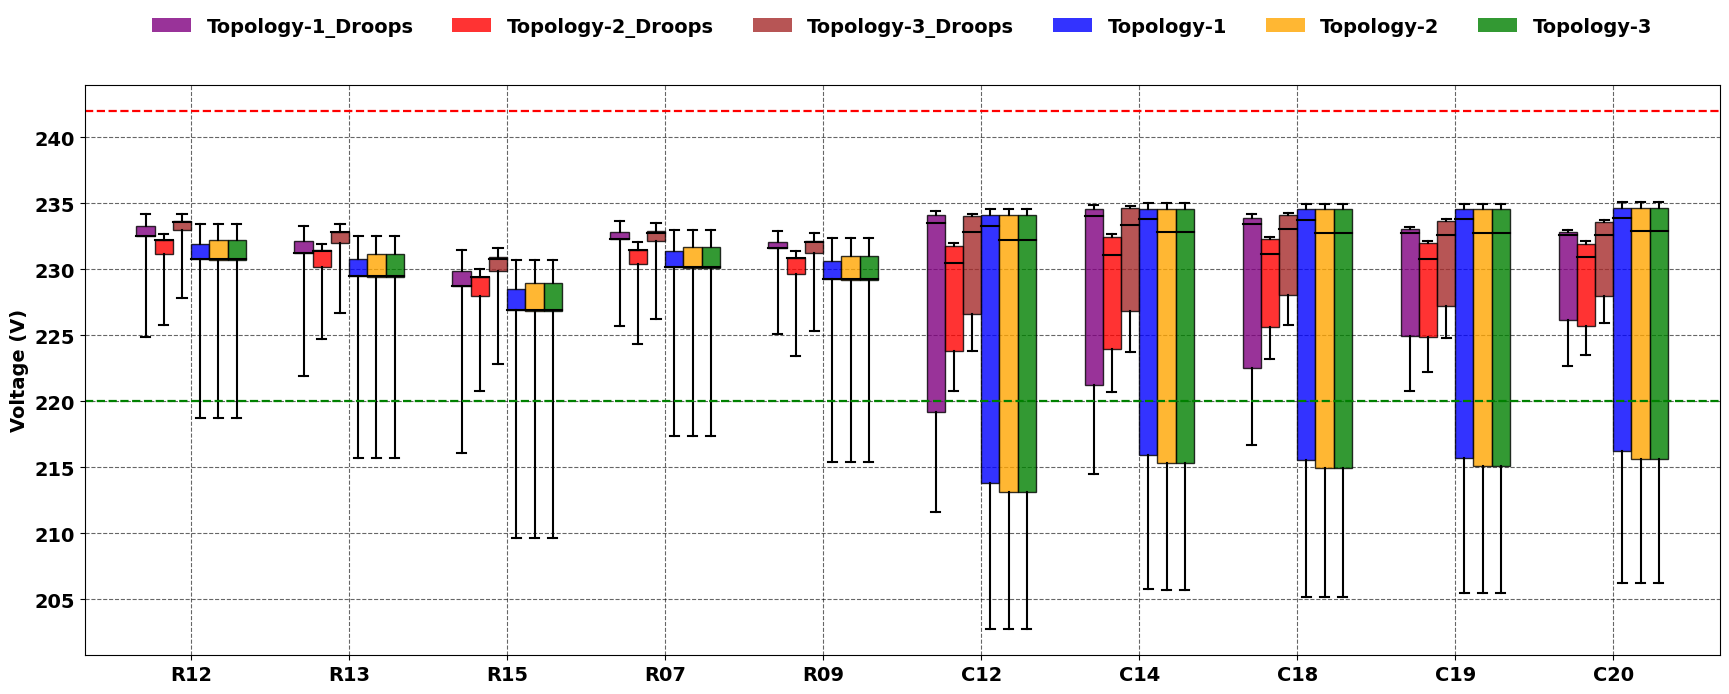

In [4]:
###### OK OK OK
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

# Define parameters
selected_buses = ['R12', 'R13', 'R15', 'R07', 'R09', 'C12', 'C14', 'C18', 'C19', 'C20']

#Improved color dictionary with more descriptive keys
topology_colors = {
    'Topology-1': 'blue', 'Topology-2': 'orange', 'Topology-3': 'green',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'red', 'Topology-3_Droops': 'brown'
}

file_names = [
    'voltage_With_Droop_T1_case3.csv', 'voltage_With_Droop_T2_case3.csv', 'voltage_With_Droop_T3_case3.csv',
    'voltage_Without_Droop_T1_case3.csv', 'voltage_Without_Droop_T2_case3.csv', 'voltage_Without_Droop_T3_case3.csv'
]

fig, ax = plt.subplots(figsize=(18, 7))  # Increased figure size for better spacing

# Boxplot with improved spacing and styling
width = 0.15  # Reduced width for closer boxes within a bus
group_sep = 0.4 # Increased separation between bus groups

positions = np.arange(len(selected_buses)) * (len(scenario_mapping) * width + group_sep)

handles = []
labels = []

for i, bus in enumerate(selected_buses):
    bus_positions = positions[i] + np.arange(len(box_plot_data[bus])) * width
    for j, (scenario, voltages) in enumerate(box_plot_data[bus].items()):
        mapped_scenario = scenario_mapping.get(scenario)
        color = topology_colors.get(mapped_scenario)

        if color is None:
            print(f"Warning: No color found for scenario '{scenario}'. Using default color.")
            color = 'gray'

        box = ax.boxplot(voltages, positions=[bus_positions[j]], widths=width, patch_artist=True, showfliers=False, whis=100000)

        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)

        if mapped_scenario not in labels:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)  # Added alpha here
            handles.append(handle)
            labels.append(mapped_scenario)


#Legend with alpha
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels), frameon=False, prop={'size': 14, 'weight': 'bold'})

# X-axis labels styling
ax.set_xticks(positions + (len(scenario_mapping) -1) * width / 2) # Center x-tick labels
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14) # Make x-tick labels bold


ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)
ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
### End

In [29]:
i_R01_a = np.abs(model.get_value('i_load_R01_a_r') + 1j*model.get_value('i_load_R01_a_i'))
print(i_R01_a)

181.0423607834883
